In [1]:
import numpy as np
import scipy.signal as signal
%matplotlib notebook
import matplotlib.pyplot as plt

In [24]:
# Component values
C_1 = 4.7e-9
C_2 = 56e-12
C_3 = 4.7e-6
R_1 = 10000
R_2 = 2400
R_3 = 1000
R_ps = [5, 2500, 5000, 10000, 15000, 25000, 35000, 50000] # 0 - 50k

<IPython.core.display.Javascript object>


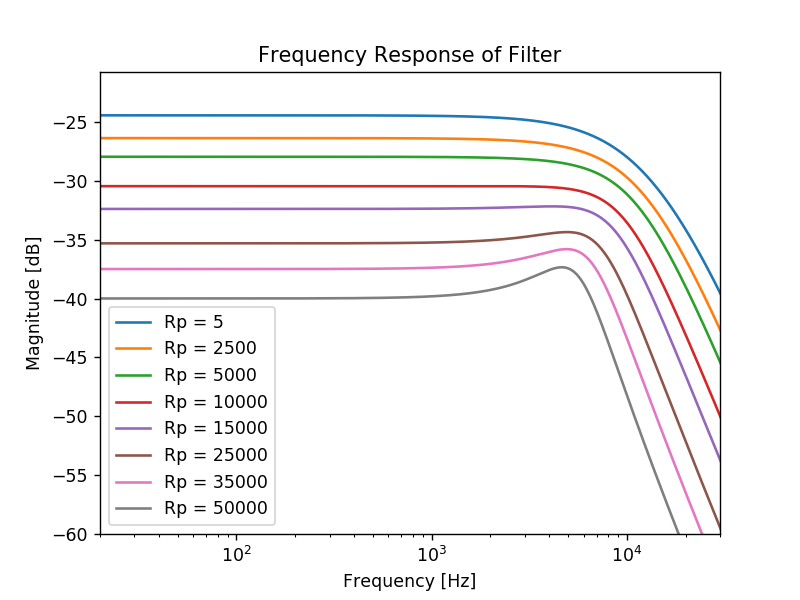

In [27]:
# plot freq response

plt.figure()
names = []
for R_p in R_ps:
    R_1p = R_1 + R_p
    
    a2 = R_1p**2 * C_1**2 * R_2 * C_3
    a1 = 4 * R_1p * C_1 * R_2 * (R_3 * C_2 + 2 * C_3)
    a0 = 4 * R_1p * C_1 * R_3
    
    b2 = 0
    b1 = 0
    b0 = R_2 * C_3
    
    w, H = signal.freqs ([b2, b1, b0], [a2, a1, a0], worN=np.logspace (1, 6, 1000))
    plt.semilogx (w / (2 * np.pi), 20 * np.log10 (np.abs (H)))
    names.append ('Rp = {}'.format (R_p))

plt.xlim ((20, 30000))
plt.ylim (-60)
plt.title ('Frequency Response of Filter')
plt.xlabel ('Frequency [Hz]')
plt.ylabel ('Magnitude [dB]')
plt.legend (names)

<IPython.core.display.Javascript object>


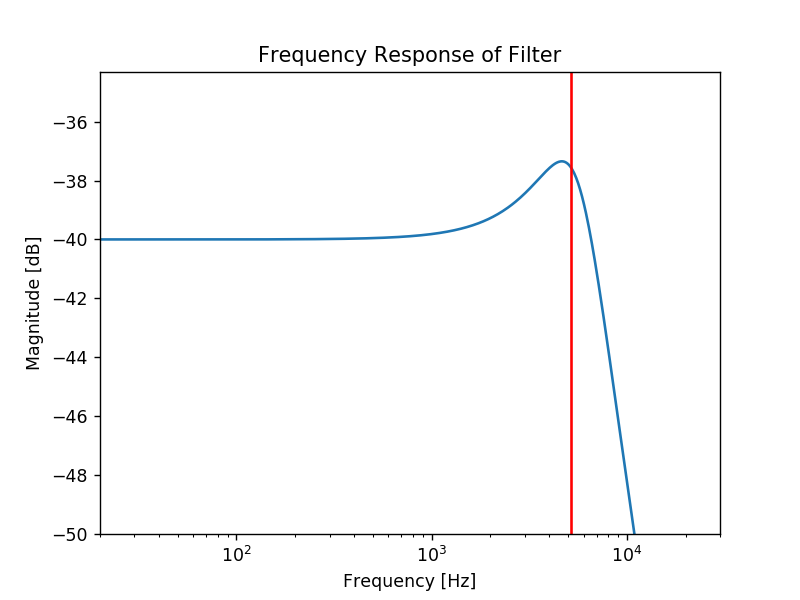

Pole frequency: 5166.731 Hz


In [34]:
# Example of finding pole frequency

plt.figure()
R_p = 50000
R_1p = R_1 + R_p

a2 = R_1p**2 * C_1**2 * R_2 * C_3
a1 = 4 * R_1p * C_1 * R_2 * (R_3 * C_2 + 2 * C_3)
a0 = 4 * R_1p * C_1 * R_3

b2 = 0
b1 = 0
b0 = R_2 * C_3

w, H = signal.freqs ([b2, b1, b0], [a2, a1, a0], worN=np.logspace (1, 6, 1000))
plt.semilogx (w / (2 * np.pi), 20 * np.log10 (np.abs (H)))

plt.xlim ((20, 30000))
plt.ylim (-50)
plt.title ('Frequency Response of Filter')
plt.xlabel ('Frequency [Hz]')
plt.ylabel ('Magnitude [dB]')

det = a1**2 - 4*a0*a2
pole = np.sqrt (np.abs (det)) / (2 * a2)
freq = pole / (2 * np.pi)
print ('Pole frequency: {0:.3f} Hz'.format (freq))
plt.axvline (freq, color='r')